# Classification using decision tree



## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the dataset

In [ ]:
from google.colab import files
# uploaded = files.upload()
dataset = pd.read_csv('/content/drive/MyDrive/DIU Course and Class/DIU/CSE322/Week-wise Lab/Lab-5/Social_Network_Ads.csv')
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, 4].values

In [ ]:
print(X)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

## Dataset preprocessing

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

#Decision tree classifier

## Fitting decision tree classifier to the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[62  6]
 [ 3 29]]


## Visualising the Training set results

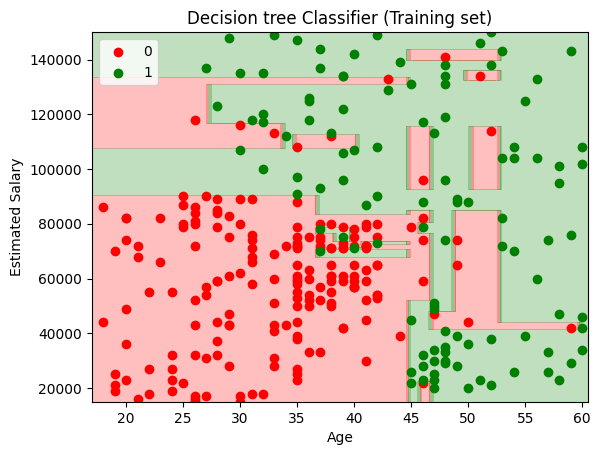

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max() + 1, step = 0.5),
                    np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max() + 1, step = 0.5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision tree Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

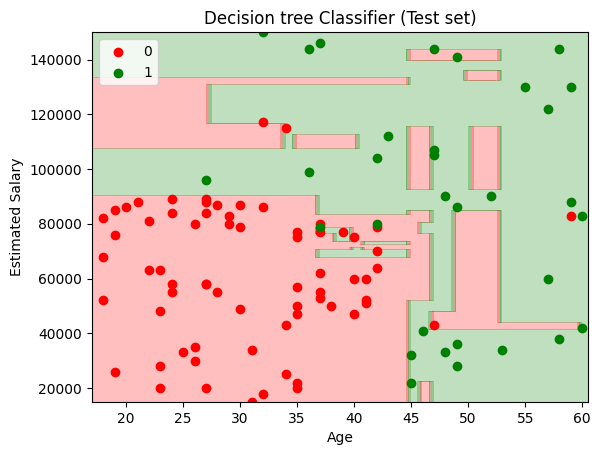

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision tree Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()